In [1]:
# Try working with SVM by scikit 
# Ali Babolhavaeji   7/4/2019

import matplotlib.pyplot as plt 
import numpy as np 

#from scipy import stats

#import seaborn as sns; sns.set()3.5
# Import standad dataSet and plot it 
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)


(-1, 3.5)

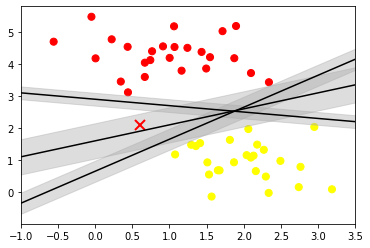

In [2]:
#Draw the lines to seprate the classes 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
xfit = np.linspace(-1, 3.5)
for m,b,d in[(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1,3.5)
#plt.show()

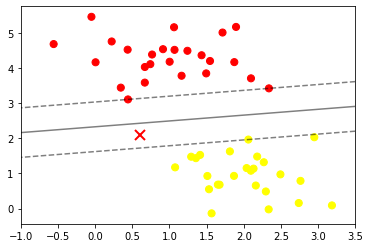

In [3]:
#Draw the lines to seprate the classes 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
xfit = np.linspace(-1, 3.5)
plt.xlim(-1,3.5)
#plt.show()

# use scikit-learn to train a SVM model and use a linear kernel for that and C will be set as a big number
from sklearn.svm import SVC  # supprot vector classifier
model=SVC(kernel='linear',C=1E10)
model.fit(X,y)

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None :
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()

    #creat grid to evaluate model
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    X,Y=np.meshgrid(x,y)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)      


plot_svc_decision_function(model);

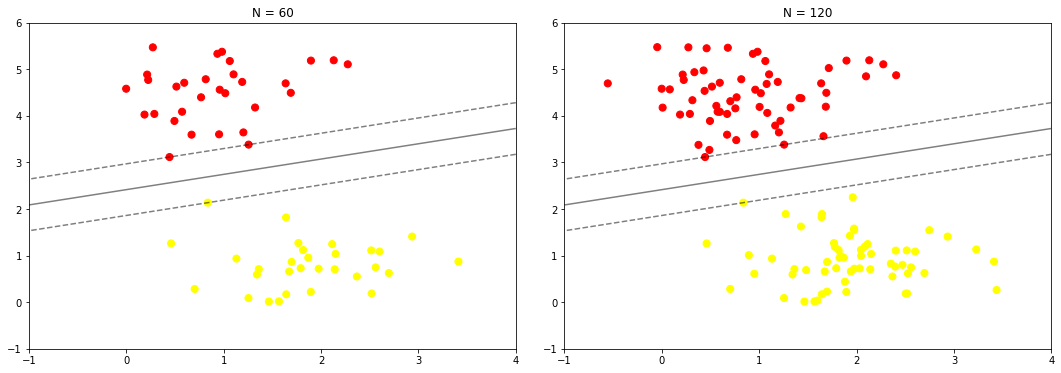

In [4]:
#several points just touch the margins--> these points are pivotal elements of this fit --> known as support vector
#in Scikit-learn you can have access to their attributes by--> support_vectors_
#plt.show()


def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
    

In [5]:
# This part shows that any point which is classify correctly dosn't hava any effect in the boundries and margins
#Technically, this is because these points do not contribute to the loss function used to fit the model, 
#so their position and number do not matter so long as they do not cross the margin.

from ipywidgets import interact, fixed
interact(plot_svm, N=[10,50, 200], ax=fixed(None));



interactive(children=(Dropdown(description='N', options=(10, 50, 200), value=10), Output()), _dom_classes=('wi…

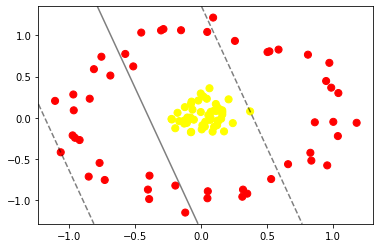

In [6]:
from sklearn.datasets.samples_generator import make_circles
X,y= make_circles(100, factor=.1,noise=.1)
clf=SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

